# Wind Rose Graph [Wind Speed Data - CPL]
## Location : Hub, Pakistan
-------

### 1. Loading the Dataset
-------

In [25]:
# Importing pandas library
import pandas as pd

In [26]:
# Loading the data set and exploring the dataset 
path="CPL-WeatherStation-Oct-21-Oct-22.xlsx"
Data=pd.read_excel(path,sheet_name=2,header=0)
print(Data.columns)
for i in range(3,17):
    Data=Data.merge(pd.read_excel(path,sheet_name=i,header=0)\
                    ,how='outer',suffixes=('_1','_'+str(i-1)))
Data.describe()

Index(['NO.', 'Time', 'Interval', 'Indoor Temperature(°C)',
       'Indoor Humidity(%)', 'Outdoor Temperature(°C)', 'Outdoor Humidity(%)',
       'Relative Pressure(mmHg)', 'Absolute Pressure(mmHg)',
       'Wind Speed(km/h)', 'Gust(km/h)', 'Wind Direction', 'DewPoint(°C)',
       'WindChill(°C)', 'Day Rainfall(mm)', 'Week Rainfall(mm)',
       'Month Rainfall(mm)', 'Year Rainfall(mm)', 'Total Rainfall(mm)',
       'Light(lux)', 'UV(uW/m2)', 'UVI'],
      dtype='object')


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where th

,NO.,Indoor Temperature(°C),Indoor Humidity(%),Relative Pressure(mmHg),Absolute Pressure(mmHg),Day Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Year Rainfall(mm),Total Rainfall(mm),Relative Pressure(inHg),Absolute Pressure(inHg),Day Rainfall(inch),Week Rainfall(inch),Month Rainfall(inch),Year Rainfall(inch),Total Rainfall(inch)
count,37285.000000,37285.000000,37285.000000,23207.000000,23207.000000,28893.000000,28893.000000,28893.000000,28893.000000,28893.000000,14078.000000,14078.000000,8392.000000,8392.000000,8392.000000,8392.000000,8392.000000
mean,1404.061821,24.727456,46.977766,754.383397,751.615642,7.049029,43.193646,129.540276,222.051023,235.098463,93.485923,92.866259,0.084217,0.463664,3.950704,7.631194,8.425057
std,905.987996,0.940442,7.189846,2.726028,2.683777,57.251422,146.198963,239.450796,290.131572,289.591826,204.412680,203.699999,0.781277,1.571537,3.785073,3.435243,3.036300
min,1.000000,19.200000,23.000000,745.900000,743.200000,0.000000,0.000000,0.000000,0.000000,0.000000,29.960000,29.550000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,622.000000,24.200000,42.000000,752.700000,749.900000,0.000000,0.000000,0.000000,0.000000,0.000000,30.220000,29.830000,0.000000,0.000000,0.010000,4.300000,8.040000
50%,1306.000000,24.800000,47.000000,754.200000,751.500000,0.000000,0.000000,0.000000,0.000000,130.500000,30.320000,29.910000,0.000000,0.000000,4.300000,8.040000,8.490000
75%,2128.000000,25.400000,52.000000,756.400000,753.500000,0.000000,0.300000,109.200000,602.400000,611.700000,30.420000,30.020000,0.000000,0.010000,8.040000,11.070000,11.070000
max,3643.000000,27.900000,74.000000,761.600000,758.700000,664.500000,703.500000,708.900000,709.500000,734.700000,758.300000,755.400000,11.060000,11.060000,11.060000,11.470000,11.470000


In [27]:
# Checking the coulmns in the dataset
Data.columns

Index(['NO.', 'Time', 'Interval', 'Indoor Temperature(°C)',
       'Indoor Humidity(%)', 'Outdoor Temperature(°C)', 'Outdoor Humidity(%)',
       'Relative Pressure(mmHg)', 'Absolute Pressure(mmHg)',
       'Wind Speed(km/h)', 'Gust(km/h)', 'Wind Direction', 'DewPoint(°C)',
       'WindChill(°C)', 'Day Rainfall(mm)', 'Week Rainfall(mm)',
       'Month Rainfall(mm)', 'Year Rainfall(mm)', 'Total Rainfall(mm)',
       'Light(lux)', 'UV(uW/m2)', 'UVI', 'Light(W/M2)',
       'Relative Pressure(inHg)', 'Absolute Pressure(inHg)', 'Wind Speed(mph)',
       'Gust(mph)', 'Day Rainfall(inch)', 'Week Rainfall(inch)',
       'Month Rainfall(inch)', 'Year Rainfall(inch)', 'Total Rainfall(inch)',
       'Wind Speed(m/s)', 'Gust(m/s)'],
      dtype='object')

### 2. Data Pre-processing
------

In [28]:
# Creating function to check and convert the numbers which are in the string datatype to float datatype
def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [29]:
# Importing numpy and math library for the mathematical applications
import numpy as np
import math

In [30]:
# Extracting the required data from the main dataset
Data2=Data[['Wind Direction','Wind Speed(km/h)','Wind Speed(mph)']]
Data2.astype(str)
Data2

,Wind Direction,Wind Speed(km/h),Wind Speed(mph)
0,248,0,NaN
1,---,--.-,NaN
2,---,--.-,NaN
3,---,--.-,NaN
4,---,--.-,NaN
...,...,...,...
37280,293,NaN,9.2
37281,270,NaN,6
37282,270,NaN,7.6
37283,270,NaN,6.9


In [31]:
# Loop for replacing all NaN values with 0

for i in range(Data2.shape[1]):
    Data2.iloc[:,i]=Data2.iloc[:,i].apply(lambda x:x if (is_number(x) and (not math.isnan(x))) else 0)
Data2

C:\Users\admin\AppData\Local\Temp\ipykernel_11012\750312890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2.iloc[:,i]=Data2.iloc[:,i].apply(lambda x:x if (is_number(x) and (not math.isnan(x))) else 0)


,Wind Direction,Wind Speed(km/h),Wind Speed(mph)
0,248,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0
3,0,0.0,0.0
4,0,0.0,0.0
...,...,...,...
37280,293,0.0,9.2
37281,270,0.0,6.0
37282,270,0.0,7.6
37283,270,0.0,6.9


In [32]:
"""for i in range(len(Data2)):
    if Data2.iloc[i,1]==0.0:
        Data2.iloc[i,1]=Data2.iloc[i,2]*1.60934
Data2"""

'for i in range(len(Data2)):\n    if Data2.iloc[i,1]==0.0:\n        Data2.iloc[i,1]=Data2.iloc[i,2]*1.60934\nData2'

In [33]:
# Converting the mph into kph
def MphToKph(x):
    if x[1]<0:
        x[1]=x[2]*1.60934
        print(x[1])
    return x

In [34]:
# Exploring the dataset
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37285 entries, 0 to 37284
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wind Direction    37285 non-null  int64  
 1   Wind Speed(km/h)  37285 non-null  float64
 2   Wind Speed(mph)   37285 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


In [35]:
# Renaming the columns
Data2=Data2.rename(columns={'Wind Direction': 'wd', 'Wind Speed(km/h)': 'wsk','Wind Speed(mph)':'wsm'})

# Merging the two columns of wind speed into a single column by assigning the values into a single column
Data2[Data2.wsk==0]=Data2[Data2.wsk==0].assign(wsk=lambda df:df.wsm * 1.60934)
Data2

,wd,wsk,wsm
0,248,0.000000,0.0
1,0,0.000000,0.0
2,0,0.000000,0.0
3,0,0.000000,0.0
4,0,0.000000,0.0
...,...,...,...
37280,293,14.805928,9.2
37281,270,9.656040,6.0
37282,270,12.230984,7.6
37283,270,11.104446,6.9


In [36]:
# Converting the wind speed from kph to m/s
Data2=Data2.assign(wsms=lambda df:df.wsk * 0.27777778)

# Excluding the non-zeros values from the zero values
Data2=Data2[(Data2.wd!=0)&(Data2.wsms!=0)]
Data2.head()

,wd,wsk,wsm,wsms
7,248,20.9,0.0,5.805556
8,270,3.6,0.0,1.000000
11,225,17.3,0.0,4.805556
12,248,17.3,0.0,4.805556
13,270,8.6,0.0,2.388889


### 3. Creation of the Windrose graph
--------

Text(0.5, 1.0, '[CPL MSD] October 2021 to October 2022')

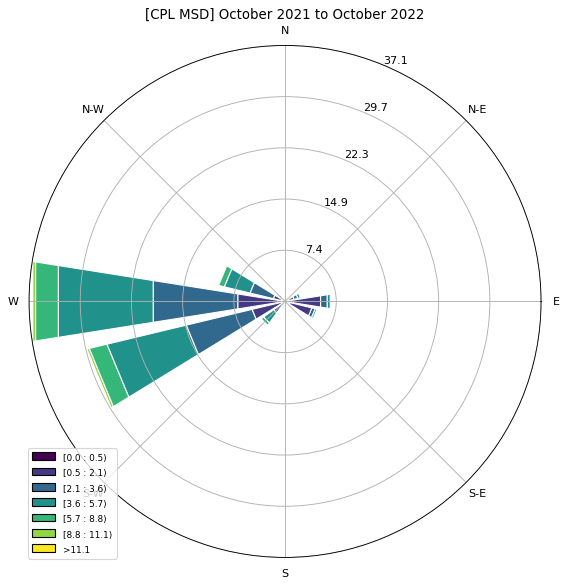

In [39]:
# Importing the windrose library
from windrose import WindroseAxes

# Extracting the wind speed and wind direction column from the dataset
ws=Data2.iloc[:,3]
wd=Data2.iloc[:,0]

# Creating the windrose graph
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, opening=0.8, edgecolor='white',normed=True,bins=[0,0.5,2.1,3.6,5.7,8.8,11.1])

# Setting up the legends and title
ax.set_legend()
ax.set_title("[CPL MSD] October 2021 to October 2022")

### 3. Statistics Summary for the Wind speed
--------

In [40]:
# Importing the numpy library
import numpy as np

# Statistics summary of the wind speed column
print("Statistics Summary of the wind_speed for [CPL MSD] October 2021 to October 2022")
ws.describe(percentiles=[.01,.05,.10,.15,.25,.50,.75,.90,1])

Statistics Summary of the wind_speed for [CPL MSD] October 2021 to October 2022


count    24777.000000
mean         3.351830
std          1.807732
min          0.305556
1%           0.312927
5%           0.715262
10%          0.983486
15%          1.388889
25%          2.011675
50%          3.388889
75%          4.388889
90%          5.388889
100%        14.171133
max         14.171133
Name: wsms, dtype: float64